# A notebook with the FRB/US model
This notebook is based on the the FRB/US model packages located here (https://www.federalreserve.gov/econres/us-models-package.htm). The packages provides an Eviews (https://www.eviews.com/) implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

In this notebook you can make your own experiments by updating variables. Also You can watch some of the capabilities of ModelFlow

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values. 
This notebook implement the **VAR** flavour. 

# Import Python libraries

In [14]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

In [15]:
%matplotlib inline

import pandas as pd
from modelclass import model  
import modelmf


# Load the model and the data 
The model and the data has been prepared in a preprocessor step and has been wrapped into one file. 

In [16]:
mfrbus, basedf =  model.modelload('mfrbusvar.pcim',run=0) 
res = mfrbus(basedf,'2020q1','2025q4',silent=1,stats=0)

file read:  C:\modelflow manual\papers\modelbook\content\Federal Reserve Board - US model\mfrbusvar.pcim


# Run alternative 

In [17]:
# Make a new DataFrame
altdf = basedf.copy()

# Update variables in the dataframe
altdf=altdf.mfcalc('rffintay_aerr = rffintay_aerr - 0.05')
#Run the model 
with model.timer('Solve Frbus'):
    res2 = mfrbus(altdf,ldumpvar = 0,solver='sim',newton_absconv=0.0001,silent=1,ljit=0)


Solve Frbus took       :         0.7141106129 Seconds


# Show the results 

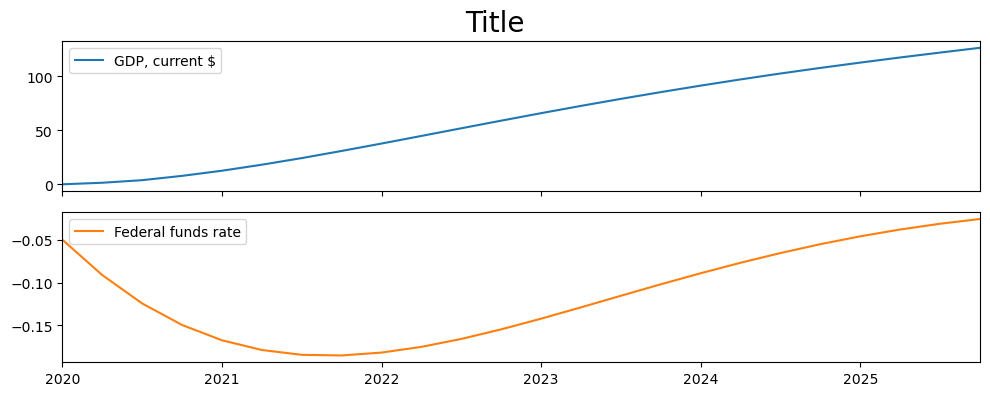

In [18]:
_ = mfrbus['XGDPN RFF'].dif.rename().plot(colrow=1,sharey=0  )

In [19]:
#mfrbus.modeldash('XGDP',jupyter=True); 

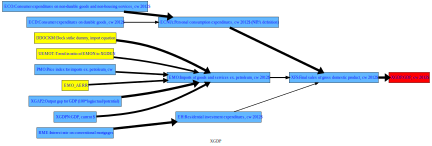

In [20]:
mfrbus.XGDP.tracepre(up=3,filter=20) 

# Look at the model structure 

In [21]:
if 0:  # set to 1 to get a dependency graph
    mfrbus.drawendo(lag=0,title='FRB/US endogeneous interpendencies',svg=1,browser=1)
# you will find the output files in different format in the /graph folder (graph/)

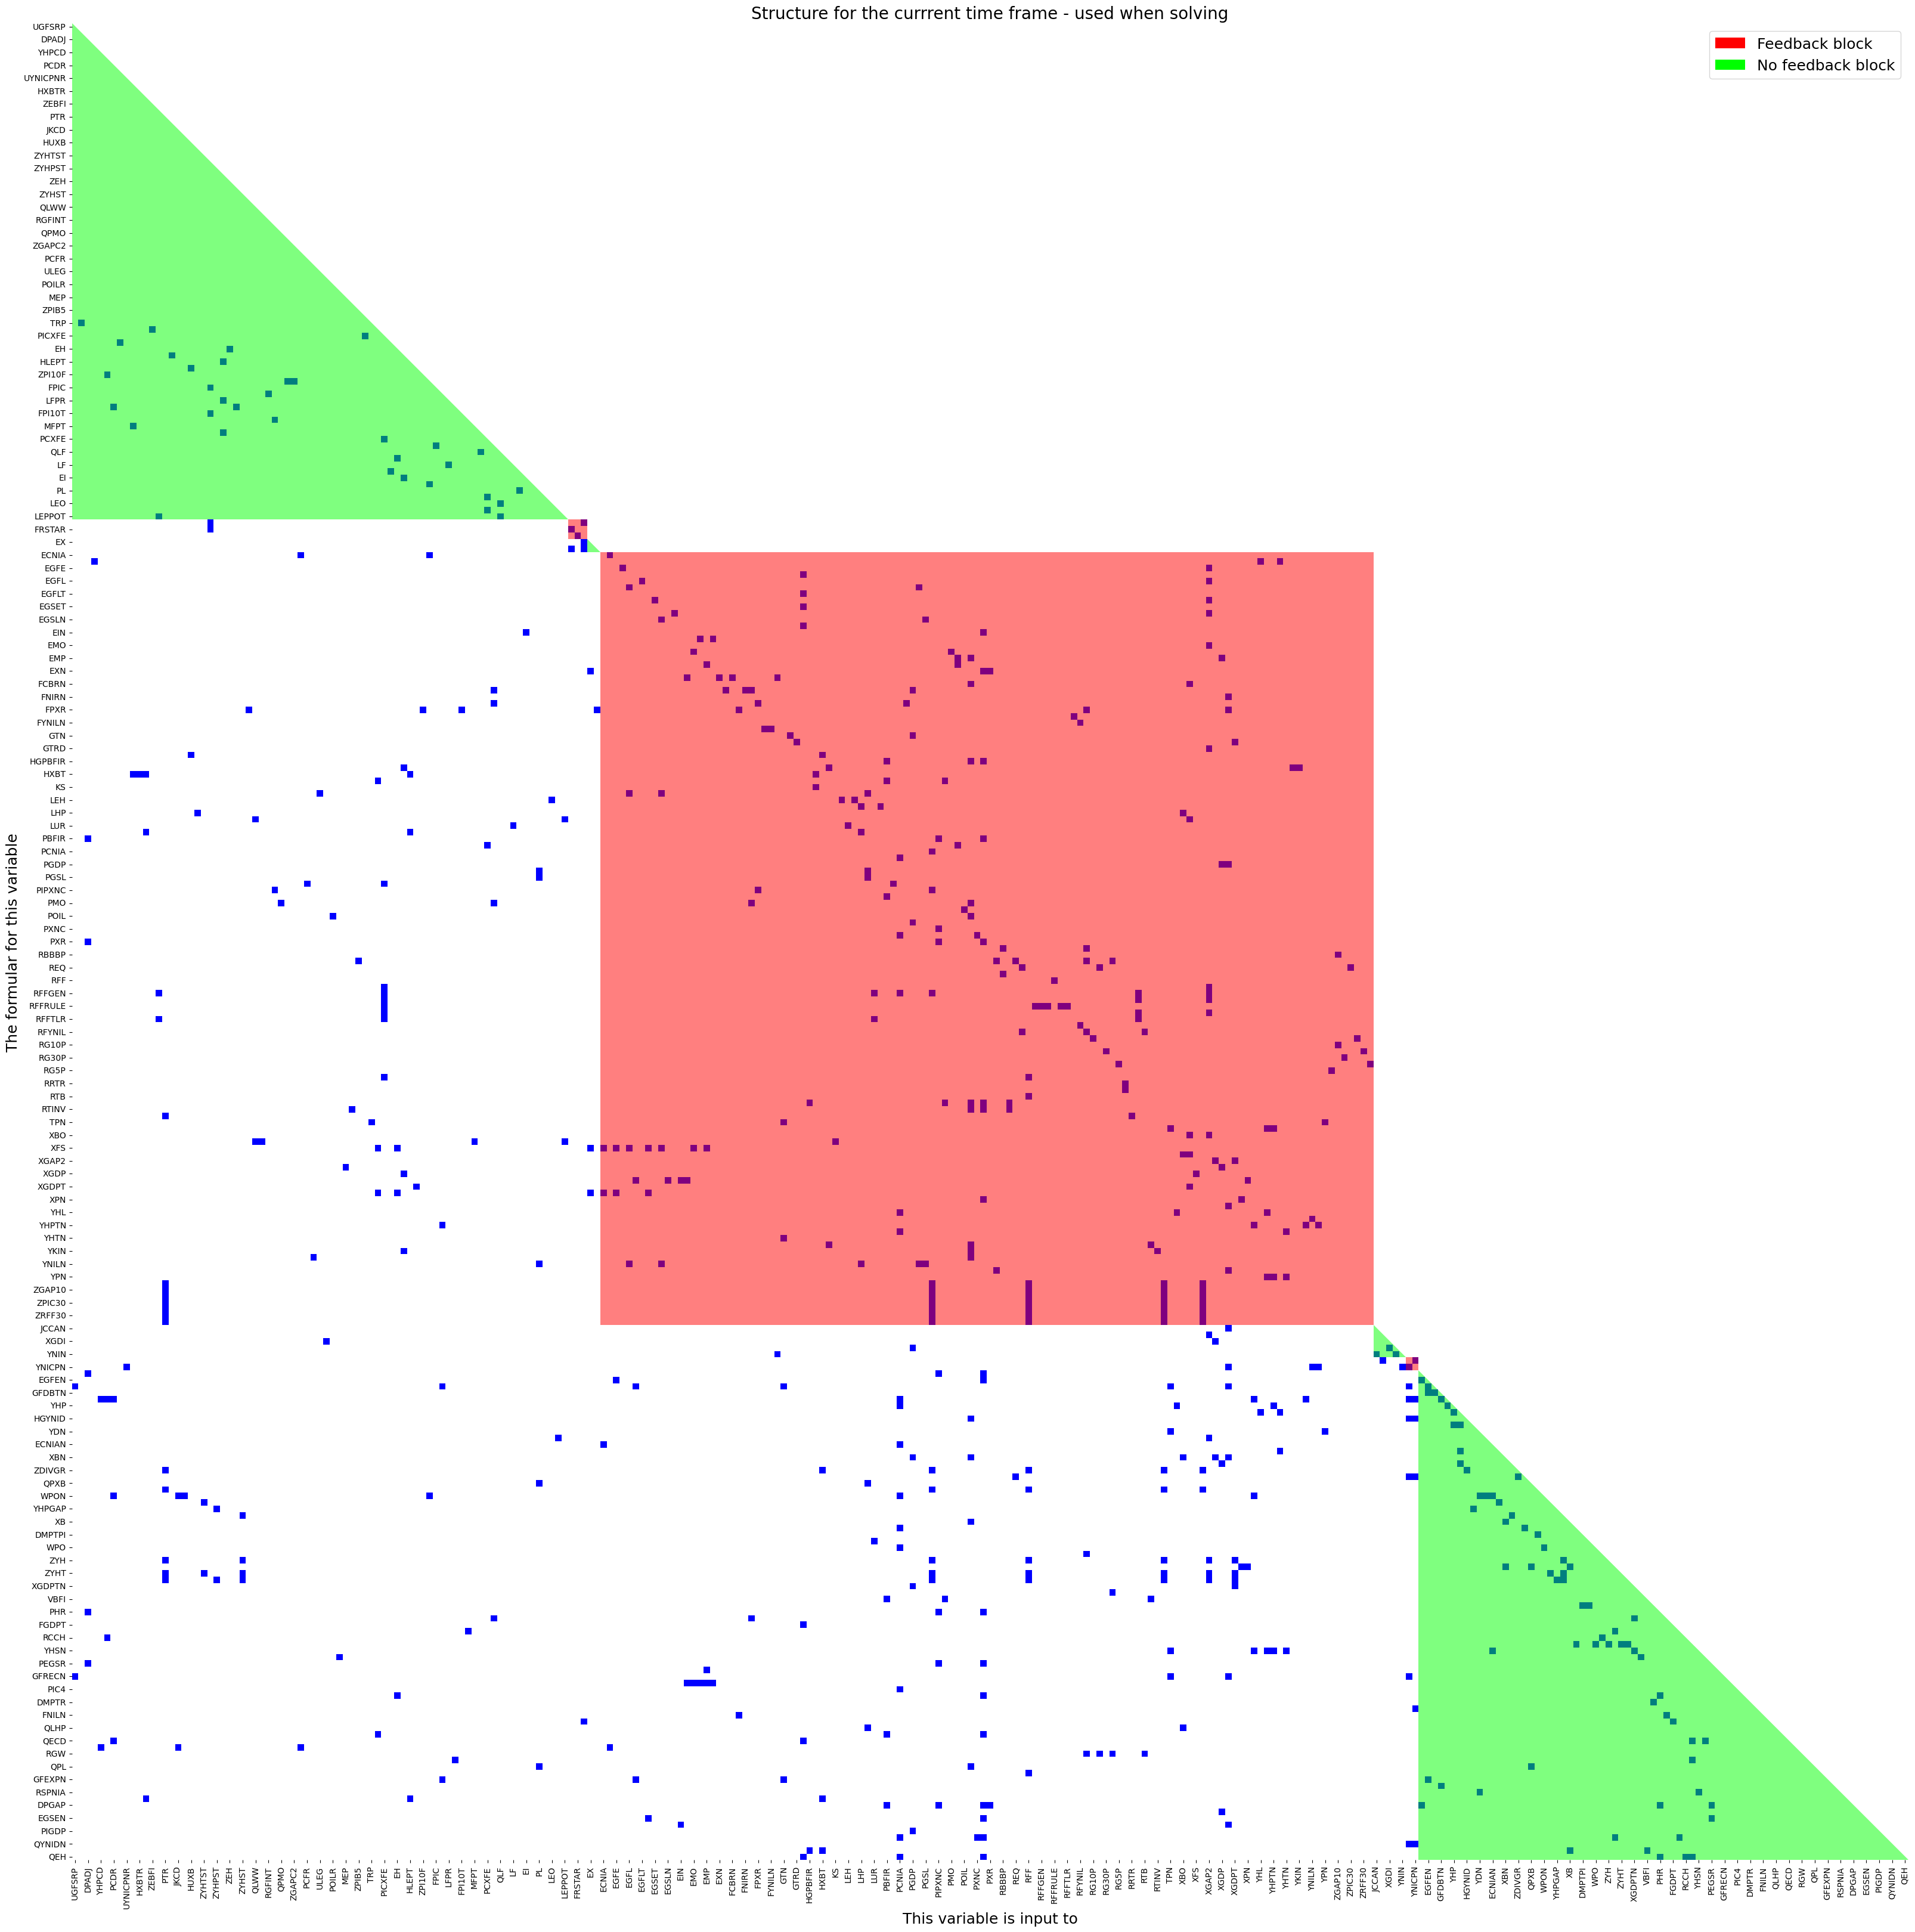

In [22]:
fig   = mfrbus.plotadjacency(size=(40,40),title= 'Structure for the currrent time frame - used when solving')
fig.savefig('graph/FRB-US causality structure current time.pdf')

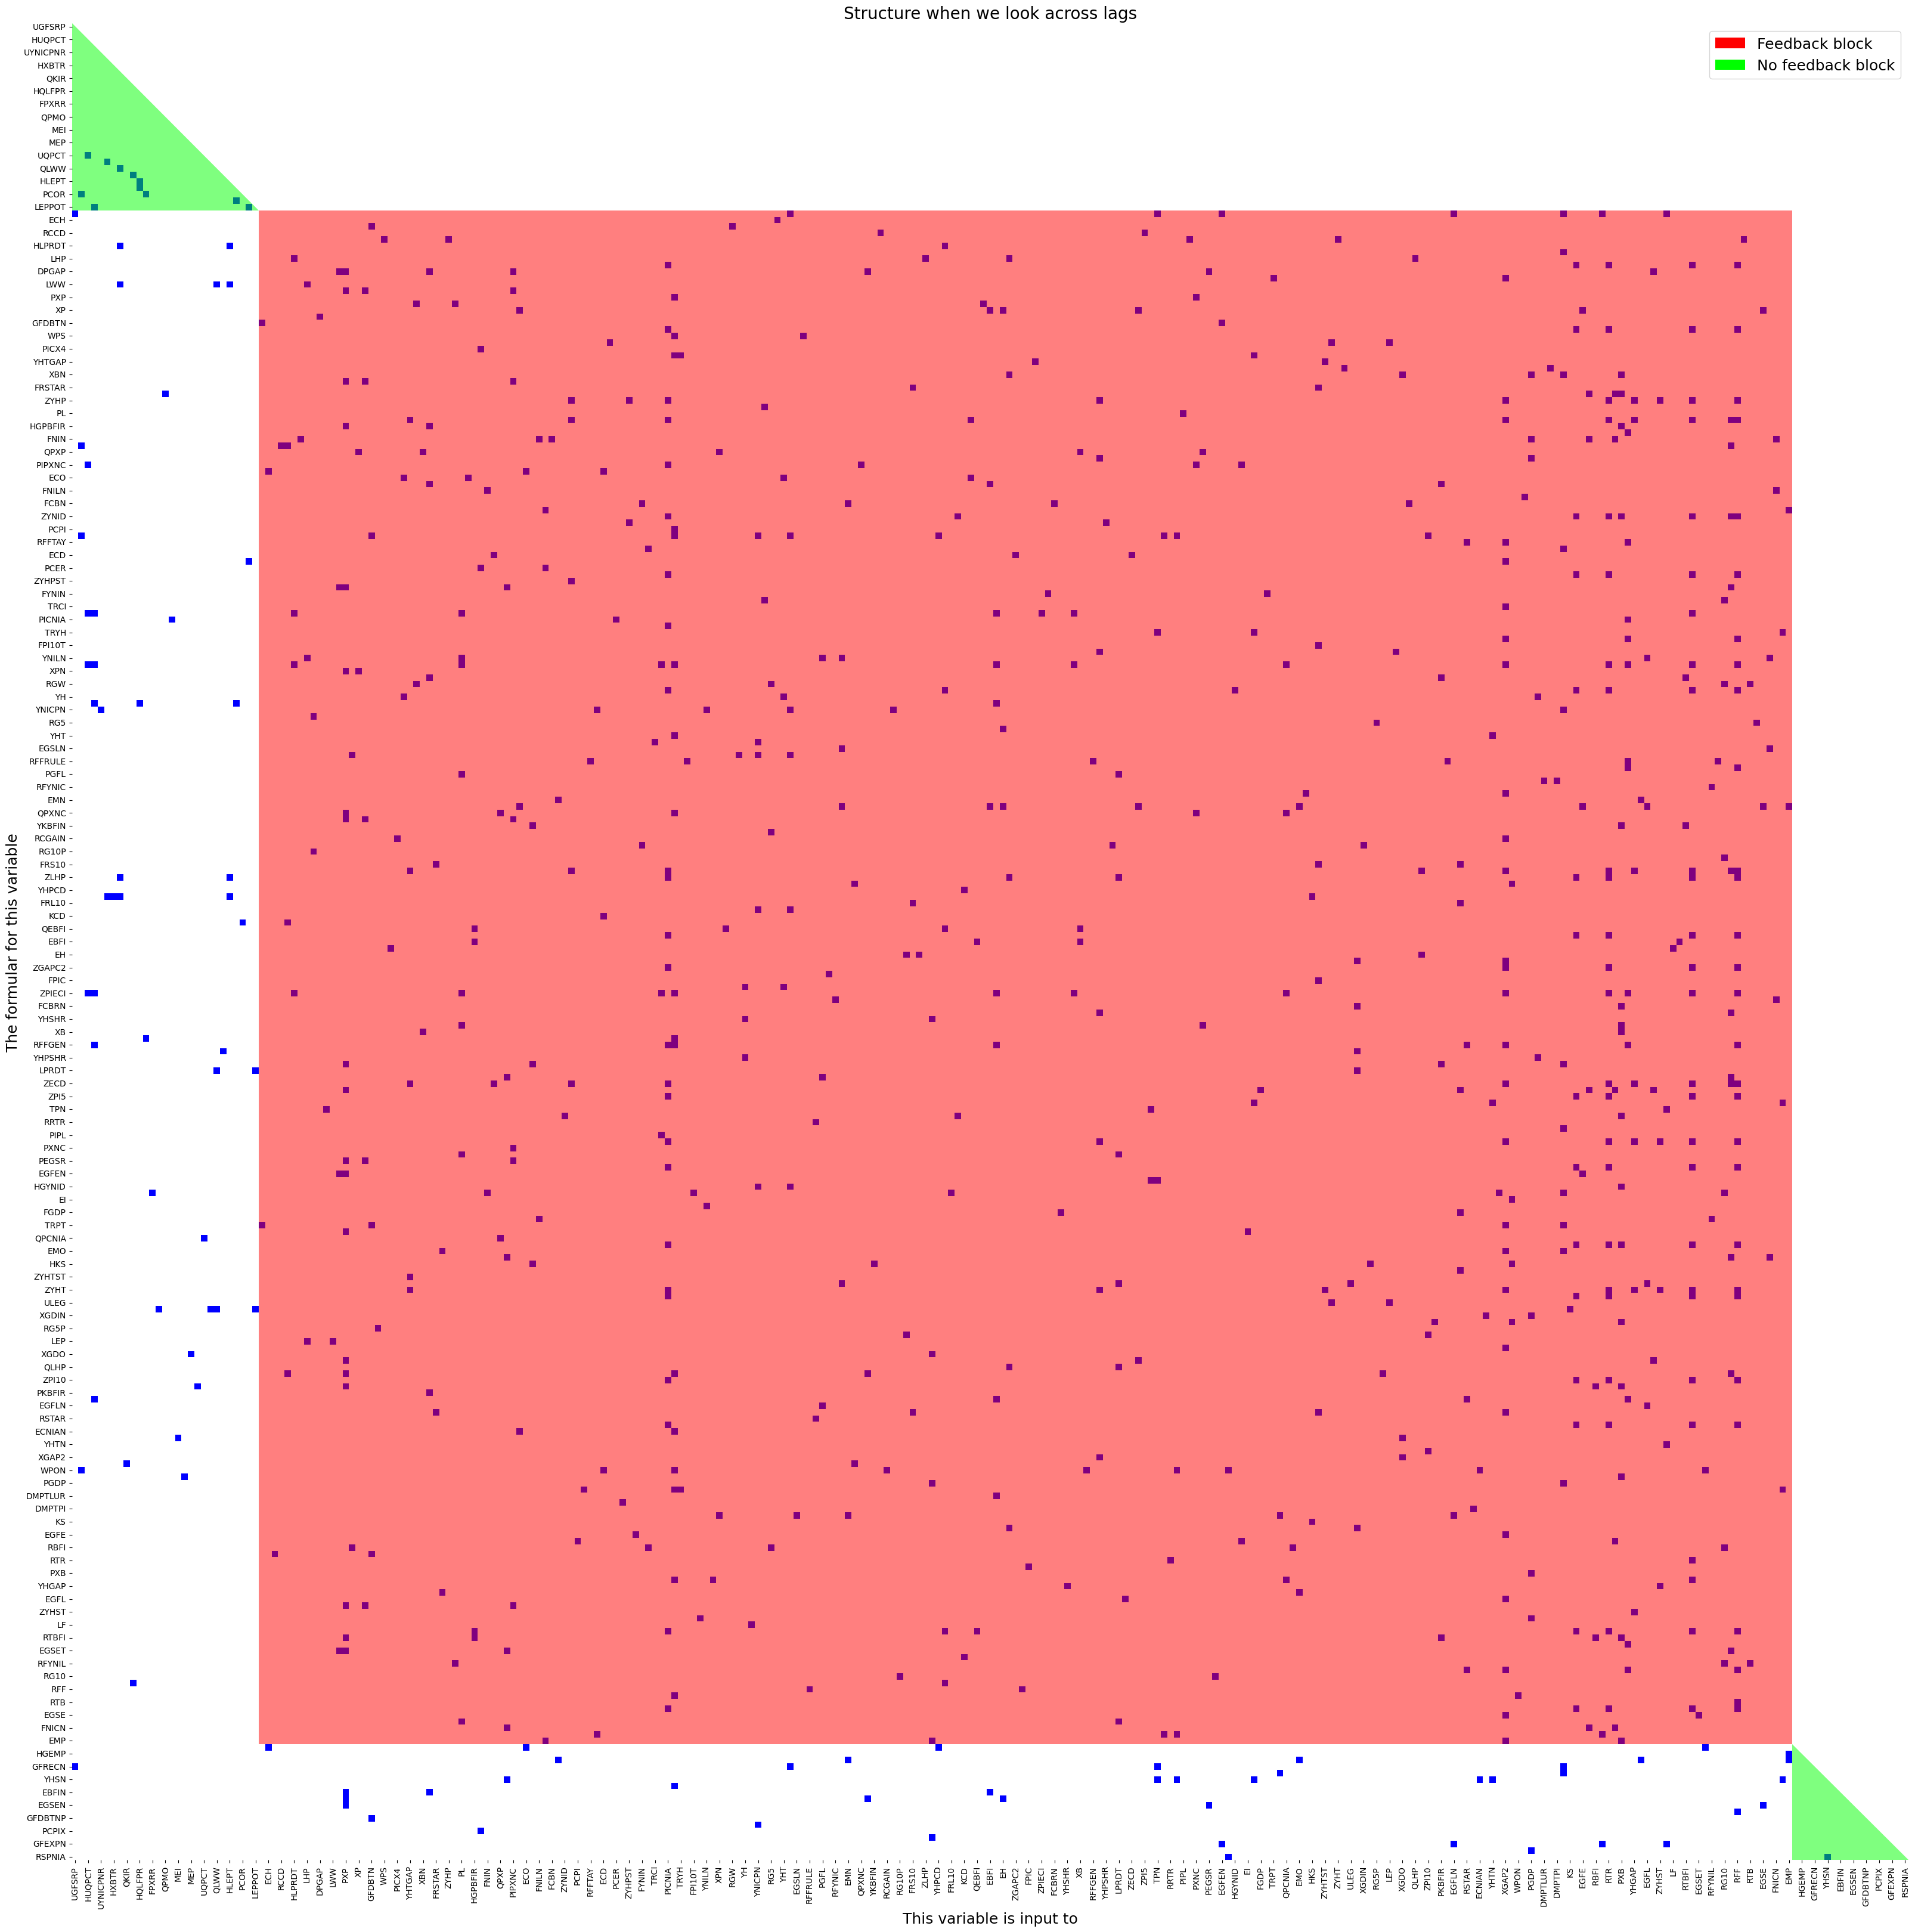

In [23]:
fig   = mfrbus.plotadjacency(size=(40,40),nolag=True,title='Structure when we look across lags')